# Spaceship Titanic: Exploratory Data Analysis

## Preparations

### Libraries

In [22]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data

In [23]:
# Type mappings
dtype_map = {
    'HomePlanet': 'category',
    'CryoSleep': bool,
    'Cabin': object,
    'Destination': 'category',
    'Age': int,
    'VIP': bool,
    'RoomService': float,
    'FoodCourt': float,
    'ShoppingMall': float,
    'Spa': float,
    'VRDeck': float,
    'Name': object,
    'Transported': bool
}

In [24]:
# Import data
titanic = pd.read_csv('Data/train.csv', index_col='PassengerId')

# Surface-Level Exploration
display(
    titanic.head(),
    titanic.describe(),
)
titanic.info()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


## Feature Extraction

In [25]:
# Total expenses
expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
titanic['Total Expenses'] = titanic[expenses_columns].sum(axis=1)

# Cabin
titanic[['Deck','CabinNum','Side']] = (
    titanic['Cabin']
    .str
    .split('/', expand=True)
)
del titanic['Cabin']

## Splitting data

In [26]:
# Train-test split
X = titanic.drop(columns='Transported')
y = titanic['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=132)
display(
    X_train.head(),
    X_train.describe()
)
X_train.info()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Total Expenses,Deck,CabinNum,Side
PassengerId,,,,,,,,,,,,,,,
1906_01,Earth,True,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Claura Booneid,0.0,G,299,S
3143_01,Mars,True,55 Cancri e,24.0,False,0.0,0.0,0.0,0.0,NaN,Dous Blane,0.0,F,592,S
7365_01,Earth,False,TRAPPIST-1e,20.0,False,0.0,802.0,0.0,16.0,0.0,Ivanna Wilderssen,818.0,G,1183,P
0217_01,Earth,False,TRAPPIST-1e,38.0,False,1517.0,0.0,0.0,27.0,0.0,Prilly Shieldson,1544.0,F,47,P
3614_01,Earth,False,TRAPPIST-1e,20.0,False,2.0,0.0,7.0,2.0,547.0,Eduard Quinnerry,558.0,F,749,P


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total Expenses
count,6813.000000,6806.000000,6810.000000,6785.000000,6807.000000,6805.000000,6954.000000
mean,28.793043,228.880106,449.651248,180.098010,305.422506,307.519177,1439.966494
std,14.522050,685.450458,1540.428664,630.253307,1096.967531,1186.420643,2748.348035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,718.000000
75%,37.000000,49.000000,75.000000,31.000000,59.000000,46.000000,1442.000000
max,79.000000,14327.000000,27723.000000,23492.000000,16594.000000,24133.000000,31074.000000


<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 1906_01 to 4728_01
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      6793 non-null   object 
 1   CryoSleep       6778 non-null   object 
 2   Destination     6811 non-null   object 
 3   Age             6813 non-null   float64
 4   VIP             6799 non-null   object 
 5   RoomService     6806 non-null   float64
 6   FoodCourt       6810 non-null   float64
 7   ShoppingMall    6785 non-null   float64
 8   Spa             6807 non-null   float64
 9   VRDeck          6805 non-null   float64
 10  Name            6795 non-null   object 
 11  Total Expenses  6954 non-null   float64
 12  Deck            6795 non-null   object 
 13  CabinNum        6795 non-null   object 
 14  Side            6795 non-null   object 
dtypes: float64(7), object(8)
memory usage: 869.2+ KB


## Exploratory Data Analysis

### Checking for null values

In [27]:
display(X_train.isna().sum())

HomePlanet        161
CryoSleep         176
Destination       143
Age               141
VIP               155
RoomService       148
FoodCourt         144
ShoppingMall      169
Spa               147
VRDeck            149
Name              159
Total Expenses      0
Deck              159
CabinNum          159
Side              159
dtype: int64

### Check distributions of numerical data

Age Distribution

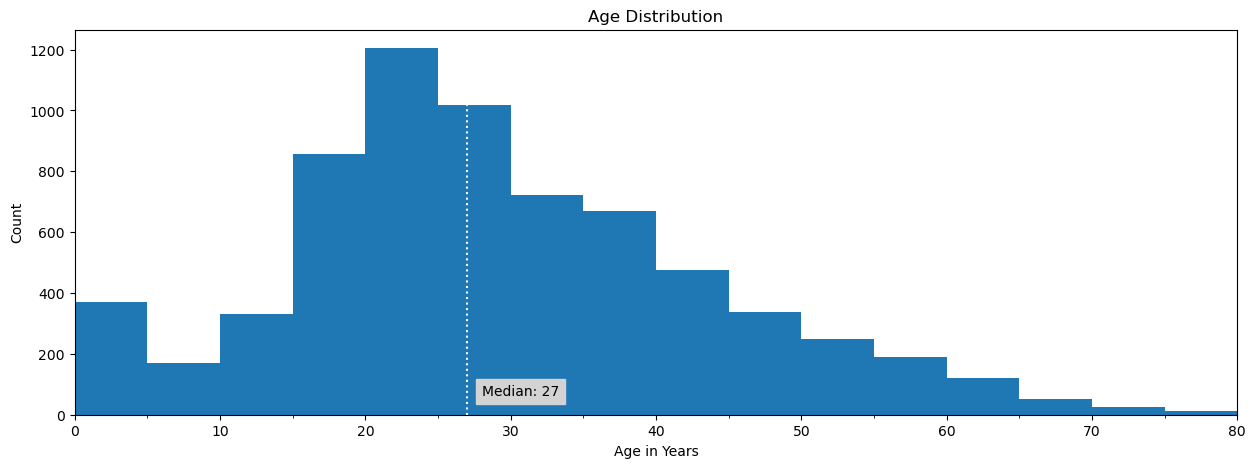

In [28]:
# Distribution of ages
ages = X_train['Age']
bins = range(0,81,5)
ticks = range(5,81,10)
median = ages.median()

# Plot settings
plt.figure(figsize=(15,5))
plt.hist(ages,bins=bins)
plt.title('Age Distribution')
plt.xlabel('Age in Years')
plt.xticks(ticks=ticks,minor=True)
plt.ylabel('Count')
plt.margins(x=0)
plt.axvline(median,color='w',linestyle='dotted')

# Text
x = median + 1
ymax = plt.ylim()[1]
y = ymax * 0.05
plt.text(
    x,y,
    s=f'Median: {median:.0f}',
    color='k',
    backgroundcolor='lightgray'
)

plt.show()

Expenses

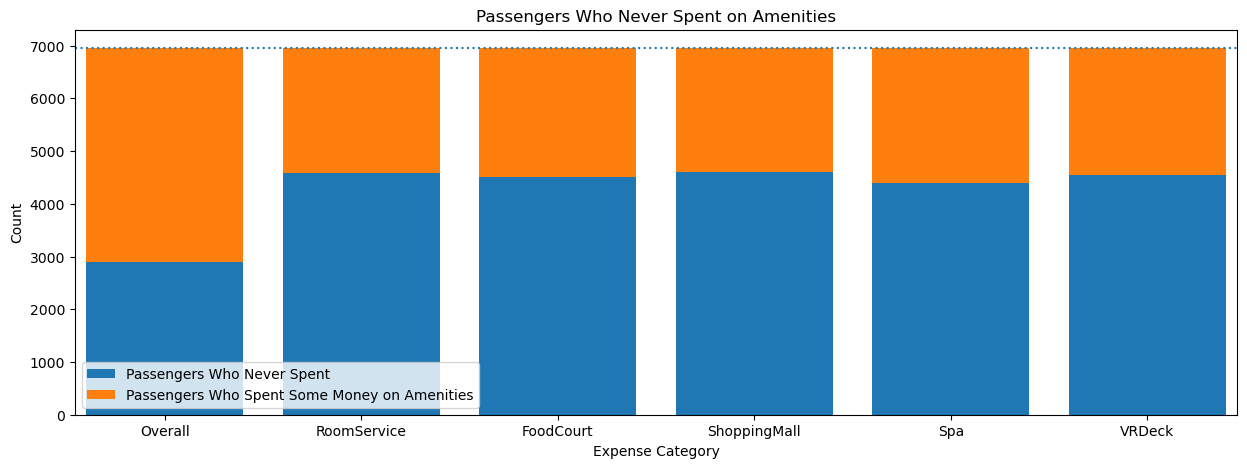

In [29]:
# Find the median and fill na with median
expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
k = len(expenses_columns)
n = len(X_train)
median = X_train[expenses_columns].median()
X_train[expenses_columns] = X_train[expenses_columns].fillna(value=0)

# Count non-spenders
non_spenders_n = dict()
filter_non_spenders = X_train['Total Expenses'] == 0
non_spenders_n['Overall'] = len(X_train[filter_non_spenders])
for column in expenses_columns:
    non_spenders_n[column] = len(X_train[X_train[column] == 0])
non_spenders_n = pd.Series(non_spenders_n)
spenders_n = len(X_train) - non_spenders_n

# Show non-spenders
plt.figure(figsize=(15,5))
plt.bar(non_spenders_n.index,non_spenders_n)
plt.bar(spenders_n.index,spenders_n, bottom=non_spenders_n)
plt.legend(['Passengers Who Never Spent','Passengers Who Spent Some Money on Amenities'], loc='lower left')
plt.axhline(n, linestyle='dotted')
plt.margins(x=0.01)
plt.title('Passengers Who Never Spent on Amenities')
plt.xlabel('Expense Category')
plt.ylabel('Count')
plt.show()

Analyze expenses that were made

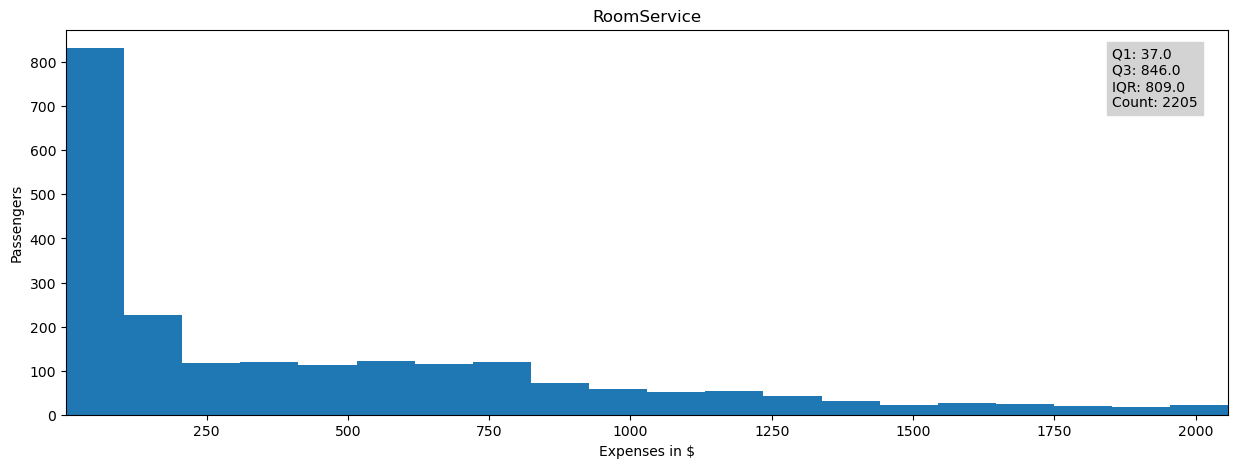

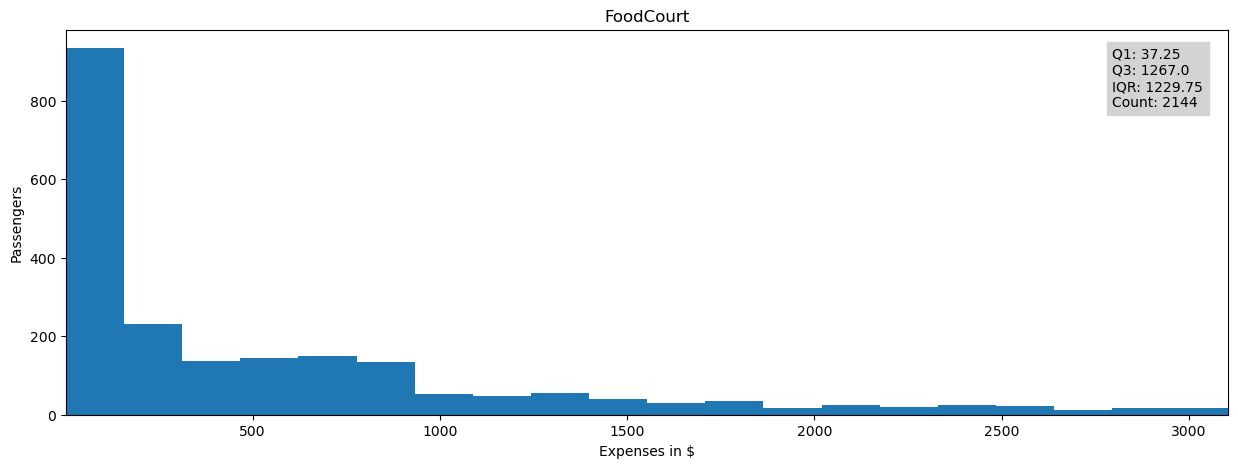

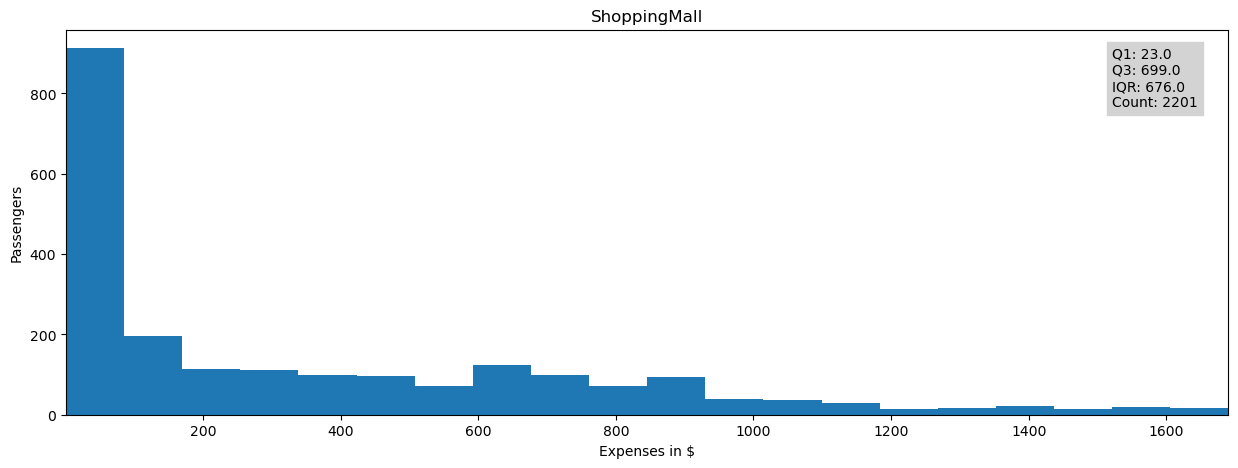

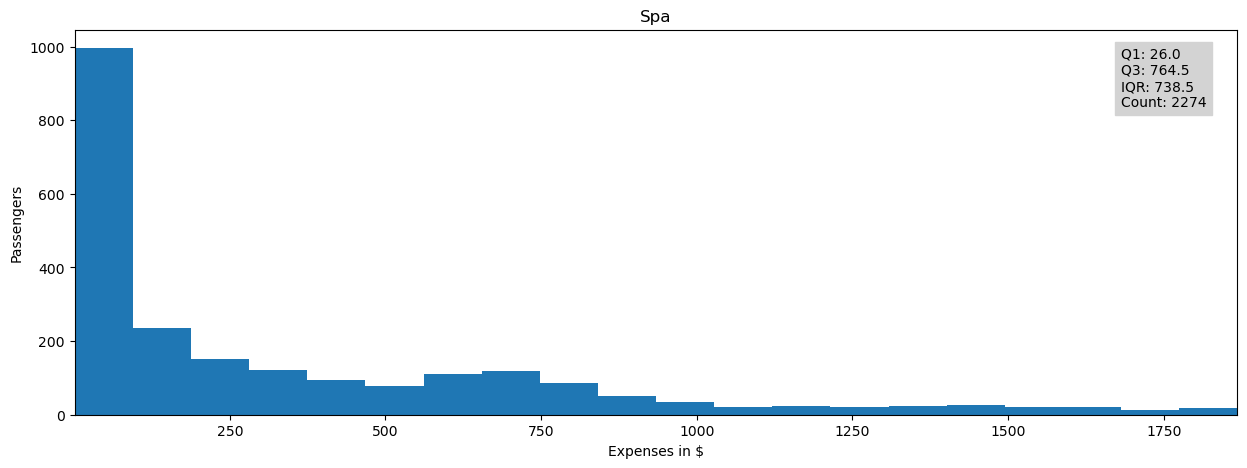

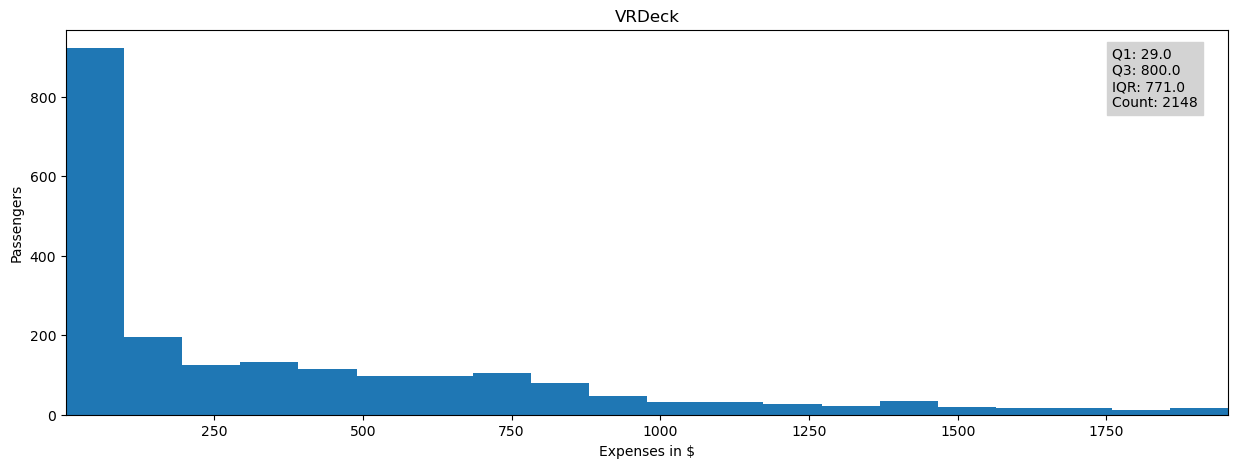

In [30]:
# Expense Distributions
for column in expenses_columns:

    # Drop instances where no expenses were made in this category
    temp = X_train.drop(index=X_train[X_train[column] == 0].index)
    
    # Determine outliers
    Q1 = temp[column].quantile(0.25)
    Q3 = temp[column].quantile(0.75)
    IQR = Q3 - Q1
    filter_outlier_lower = temp[column] < Q1 - IQR*1.5
    filter_outlier_upper = temp[column] > Q3 + IQR*1.5
    
    # Plot distribution without outliers
    X_train_noOutliers = temp[~filter_outlier_lower & ~filter_outlier_upper]
    X_train_noOutliers_count = len(X_train_noOutliers)

    plt.figure(figsize=(15,5))
    plt.margins(x=0)
    plt.hist(X_train_noOutliers[column],bins=20)
    plt.title(f'{column}')
    plt.xlabel('Expenses in $')
    plt.ylabel('Passengers')

    # Display outliers in text
    x = plt.xlim()[1] * 0.9
    y = plt.ylim()[1] * 0.8

    plt.text(
        x,y,
        s=f'Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nCount: {X_train_noOutliers_count}',
        backgroundcolor='lightgray'
    )
    plt.show()

Categorical Data

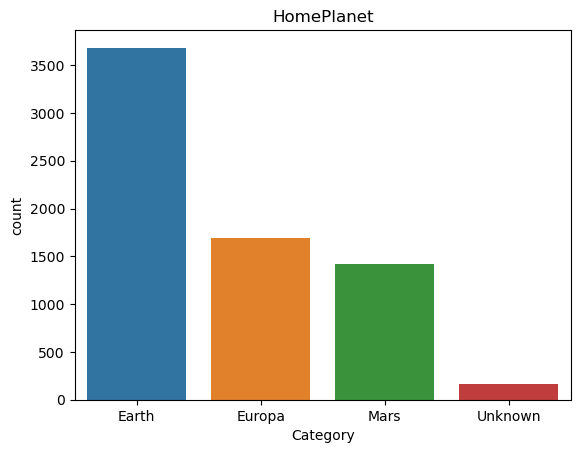

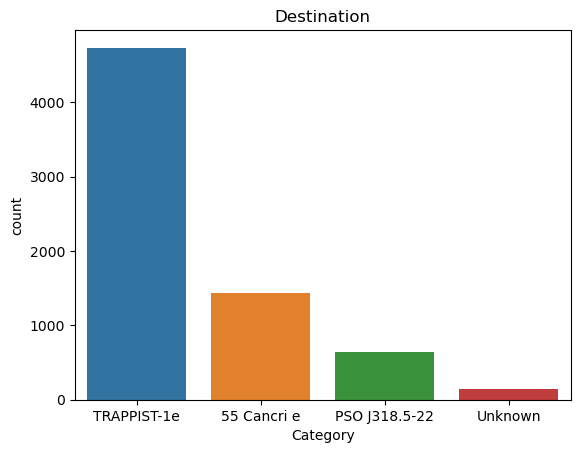

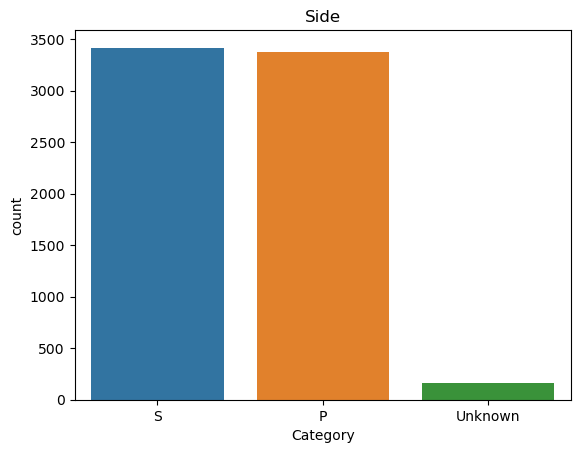

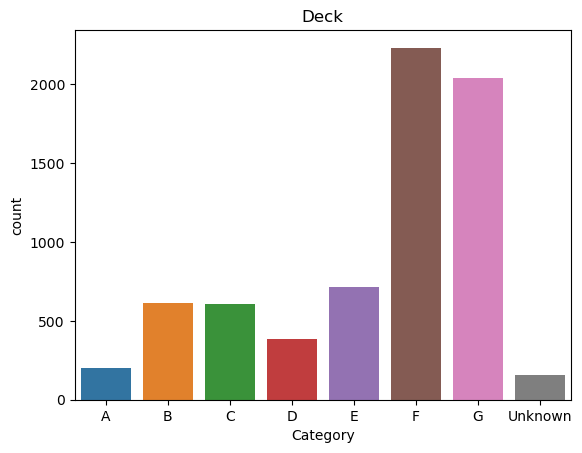

In [31]:
cat_columns = ['HomePlanet','Destination','Side']
X_train[cat_columns] = X_train[cat_columns].astype('category')
for column in cat_columns:
    X_train[column].fillna('Unknown',inplace=True)
    sns.countplot(X_train, x=column, order=X_train[column].value_counts().index)
    plt.title(column)
    plt.xlabel('Category')
    plt.show()

# Deck is ordinal
X_train['Deck'].fillna('Unknown',inplace=True)
X_train['Deck'] = X_train['Deck'].astype('category')
sns.countplot(X_train, x='Deck', order=['A','B','C','D','E','F','G','Unknown'])
plt.title('Deck')
plt.xlabel('Category')
plt.show()